<a href="https://colab.research.google.com/github/crodier1/data_science/blob/main/CNN_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

import opendatasets as od

od.download("https://www.kaggle.com/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/data")

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPool2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv')

Y = df['emotion']
X = df['pixels']

In [ ]:
def to_array(x):
  return np.array([int(i) / 255 for i in str(x).split(' ')]).reshape(48,48,1)

X = X.apply(lambda x: to_array(x))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                   random_state=104,
                                   shuffle=True)

In [ ]:
X_train = tf.convert_to_tensor(list(X_train.values))
y_train = tf.convert_to_tensor(y_train.values)

In [ ]:
X_test = tf.convert_to_tensor(list(X_test.values))
y_test = tf.convert_to_tensor(y_test.values)

In [ ]:
K = len(set(Y))
K

7

In [ ]:
X_train[0].shape

TensorShape([48, 48, 1])

In [ ]:
# i = Input(shape= X_train[0].shape)
# x = Conv2D(1, 3, strides= 2, activation= 'relu')(i)
# x = Conv2D(64, 3, strides= 2, activation= 'relu')(x)
# x = Conv2D(128, 3, strides= 2, activation= 'relu')(x)
# x = Flatten()(x)
# x = Dropout(0.2)(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.2)(x)
# x = Dense(K, activation='softmax')(x)

i = Input(shape= X_train[0].shape)

x = Conv2D(1, 3, strides= 2, activation= 'relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation= 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)

x = Conv2D(64, (3,3), activation= 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation= 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)

x = Conv2D(128, (3,3), activation= 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation= 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

model = Model(i,x)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

train_generator = datagen.flow(X_train, y_train, batch_size=32)

r = model.fit(train_generator, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
673/673 [==============================] - 101s 146ms/step - loss: 1.7576 - accuracy: 0.3206 - val_loss: 1.5182 - val_accuracy: 0.4126
Epoch 2/50
673/673 [==============================] - 94s 139ms/step - loss: 1.5304 - accuracy: 0.4018 - val_loss: 1.4508 - val_accuracy: 0.4444
Epoch 3/50
673/673 [==============================] - 103s 152ms/step - loss: 1.4496 - accuracy: 0.4418 - val_loss: 1.4747 - val_accuracy: 0.4323
Epoch 4/50
673/673 [==============================] - 100s 148ms/step - loss: 1.4047 - accuracy: 0.4599 - val_loss: 1.3331 - val_accuracy: 0.4890
Epoch 5/50
673/673 [==============================] - 100s 149ms/step - loss: 1.3665 - accuracy: 0.4794 - val_loss: 1.3296 - val_accuracy: 0.4914
Epoch 6/50
673/673 [==============================] - 95s 140ms/step - loss: 1.3312 - accuracy: 0.4943 - val_loss: 1.3292 - val_accuracy: 0.4908
Epoch 7/50
673/673 [==============================] - 95s 140ms/step - loss: 1.3036 - accuracy: 0.5028 - val_loss: 1.3441 - va

In [ ]:
# r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

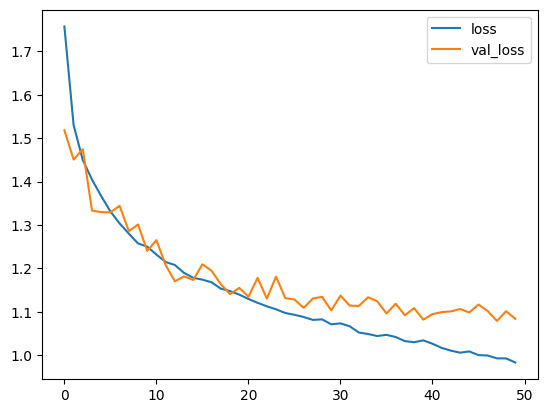

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

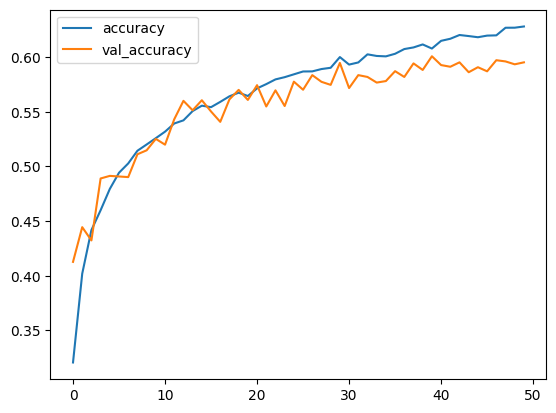

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
predictions = model.predict(X_test)

predictions = [np.argmax(i) for i in predictions]

from sklearn.metrics import confusion_matrix
print(np.unique(y_test))
print(confusion_matrix(y_test, predictions))

plt.imshow(confusion_matrix(y_test, predictions))
plt.colorbar()

NameError: name 'x_test' is not defined